In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Dataset Loading
df=pd.read_csv('Unemployement.csv')
print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,Year,Population (millions),GDP Growth Rate (%),Inflation Rate (%),Unemployment Rate (%),Poverty Headcount Ratio (%),Agriculture Growth Rate (%),Government Social Spending (% of GDP),External Debt (USD billions),Climate Disasters (count)
0,2000,138.0,4.2,3.6,6.0,34.7,2.5,3.0,55.0,2
1,2001,140.5,3.1,4.4,6.2,33.5,2.0,3.1,57.0,1
2,2002,143.0,3.7,3.5,6.1,32.1,4.1,3.2,58.5,1
3,2003,145.5,5.0,3.1,5.8,30.2,4.5,3.3,59.0,0
4,2004,148.0,6.4,7.4,5.5,28.6,6.0,3.5,60.0,1


In [4]:
#EDA
print("Information of dataset:")
df.info()

Information of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   11 non-null     int64  
 1   Unemployment Rate (%)  11 non-null     float64
 2   GDP Growth Rate (%)    11 non-null     float64
 3   Inflation Rate (%)     11 non-null     float64
 4   Period                 11 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 572.0+ bytes


In [7]:
print("Missing values in dataset:")
df.isnull().sum()

Missing values in dataset:


Year                     0
Unemployment Rate (%)    0
GDP Growth Rate (%)      0
Inflation Rate (%)       0
Period                   0
dtype: int64

In [10]:
print("Duplicate values in dataset:")
df.duplicated()

Duplicate values in dataset:


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [8]:
print("Summay Statistic of dataset:")
df.describe()

Summay Statistic of dataset:


,Year,Unemployment Rate (%),GDP Growth Rate (%),Inflation Rate (%)
count,11.000000,11.000000,11.000000,11.000000
mean,2012.090909,5.936364,3.690909,4.527273
std,9.802597,1.260375,3.424749,1.675166
min,2000.000000,4.600000,-3.500000,3.000000
25%,2002.500000,5.000000,3.400000,3.350000
50%,2018.000000,5.800000,5.000000,3.800000
75%,2020.500000,6.150000,6.050000,5.450000
max,2023.000000,8.500000,6.400000,7.400000


In [13]:
#Catagorize Time into before,during,after Covid-19
def divide(Year):
    if Year<2020:
        return "Before COVID-19"
    elif  2020<=Year<=2021:
        return "During COVID-19"
    else:
        return "After COVID-19"
df["Time"]=df["Year"].apply(divide)
df.head()
     

,Year,Unemployment Rate (%),GDP Growth Rate (%),Inflation Rate (%),Period,Time
0,2000,6.0,4.2,3.6,Before Covid,Before COVID-19
1,2001,6.2,3.1,4.4,Before Covid,Before COVID-19
2,2002,6.1,3.7,3.5,Before Covid,Before COVID-19
3,2003,5.8,5.0,3.1,Before Covid,Before COVID-19
4,2004,5.5,6.4,7.4,Before Covid,Before COVID-19


In [14]:
compare= df.groupby("Time").mean(numeric_only=True)
print("📌 Average Indicators by Period:\n")
print(compare)

📌 Average Indicators by Period:

                        Year  Unemployment Rate (%)  GDP Growth Rate (%)  \
Time                                                                       
After COVID-19   2022.500000               4.950000             5.750000   
Before COVID-19  2006.714286               5.571429             4.971429   
During COVID-19  2020.500000               8.200000            -2.850000   

                 Inflation Rate (%)  
Time                                 
After COVID-19             3.950000  
Before COVID-19            4.028571  
During COVID-19            6.850000  


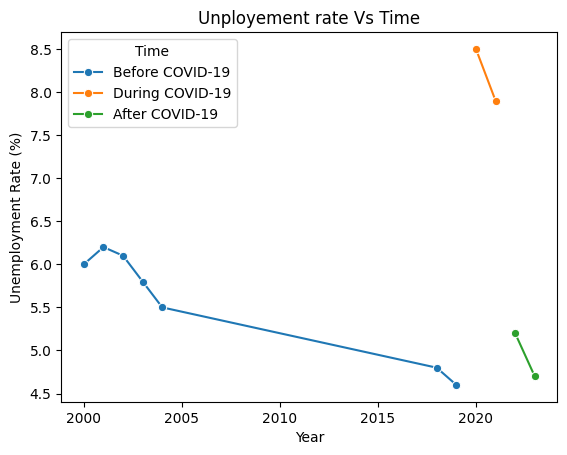

In [20]:
#Visualization or Analysis
plt.title("Unployement rate Vs Time")
sns.lineplot(x="Year",y= "Unemployment Rate (%)",data=df,hue="Time",marker='o')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()

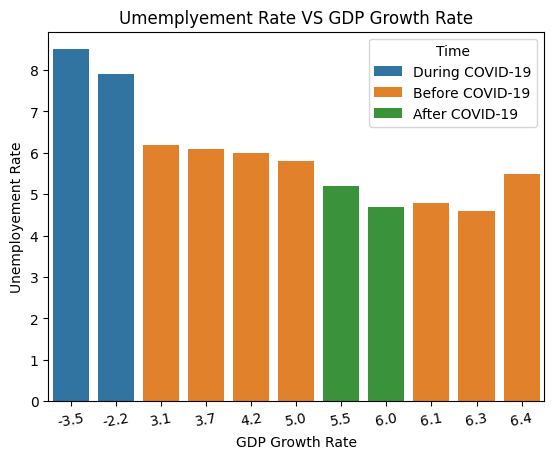

In [22]:
#Unemplyement Vs GDP Growth rate
sns.barplot(x="GDP Growth Rate (%)",y="Unemployment Rate (%)",data=df,hue="Time")
plt.title("Umemplyement Rate VS GDP Growth Rate")
plt.xlabel("GDP Growth Rate")
plt.ylabel("Unemployement Rate")
plt.xticks(rotation=10)
plt.show()

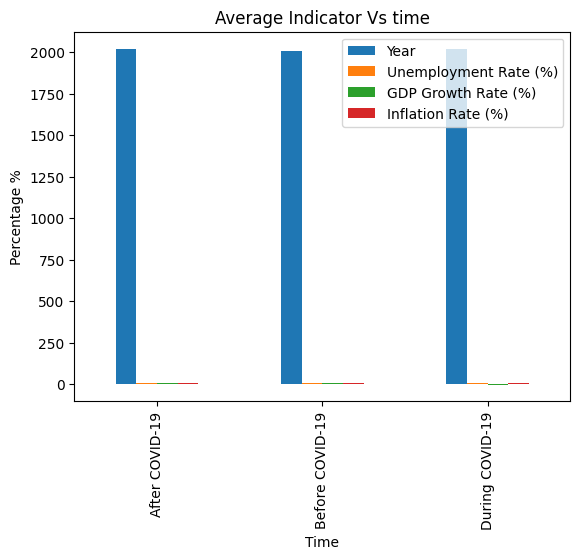

In [27]:
#Comparison plot
compare.plot(kind="bar")
plt.title("Average Indicator Vs time")
plt.ylabel("Percentage %")
plt.show()


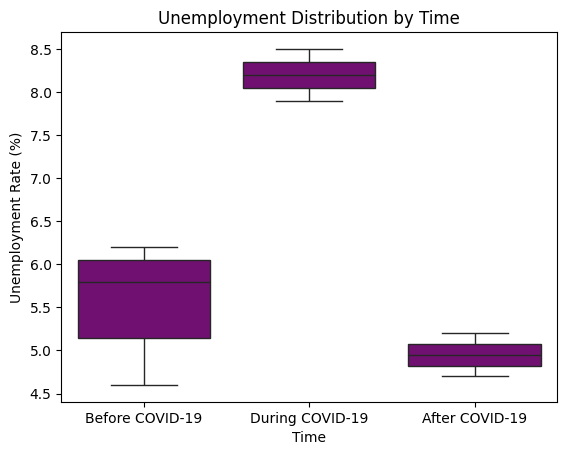

In [32]:
sns.boxplot(data=df, x="Time", y="Unemployment Rate (%)",color='purple')
plt.title("Unemployment Distribution by Time")
plt.show()

<Axes: >

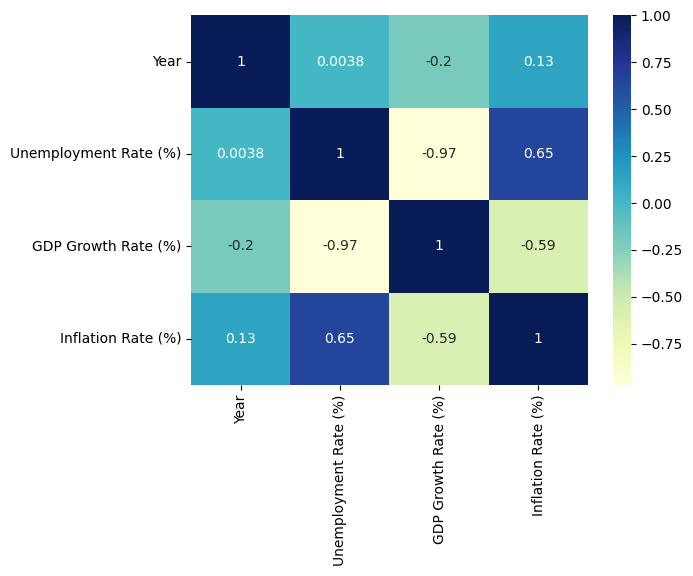

In [42]:
Corr=df.corr(numeric_only=True)
sns.heatmap(Corr,annot=True,cmap="YlGnBu")
